In [1]:
import numpy as np
import nat_asd_utils
import nibabel as nb

pixdim[1,2,3] should be non-zero; setting 0 dims to 1


In [7]:
def load_fmri_data(im_file):
    # load fmri data for a subject
    img = nb.load(im_file)
    img_y = img.get_fdata()
    return(img_y)


In [9]:
fmriprep_folder='/nese/mit/group/sig/projects/cneuromod/friends/postproc_fmriprep'
sub='01'
ses='001'
task='s01e02a'


fmriprep_data=f'{fmriprep_folder}/sub-{sub}/sub-{sub}_ses-{ses}_task-{task}_space-fsLR_den-91k_bold_smoothed.dtseries.nii'
Y=load_fmri_data(fmriprep_data)

In [10]:
Y.shape

(472, 91282)

In [6]:
import pilot

X,feats=pilot.load_features('cochresnet50pca10hrffriends_s01e02b')

In [10]:
%run pilot.py -s 01 -p a4a5 -f cochresnet50pca1hrffriends_s01e02a -t s01e02a -d 0

running subject 01
loaded parcels ['A4', 'A5']
loaded brain data
No value was passed to args.bootstrap
starting regression
17.09228754043579
saving results


In [43]:
%run pilot-cnm-length.py -s 01 -p a4a5 -f 1 -t 5 -d 0

running subject 01
loaded parcels ['A4', 'A5']
loaded brain data
loaded brain data
starting regression
19.188603401184082
mean stacked r2s 0.19185192020019054
saving results


In [2]:
stacked_r2s_list_list=[]
for pca in ['1', '10', '100']:
    stacked_r2s_list=[]
    name=f'friends_cochresnet50pca{pca}'
    for s in ['01', '02', '03', '06']:
        for split in ['a','b']:
            loaded=np.load(f'../good_pilots/sub-{s}_roi-a4a5_feat-cochresnet50pca{pca}hrffriends_s01e02{split}_delay-0_friends.npz')
            stacked_r2s_list.append(np.mean(loaded['stacked_r2s']))
    stacked_r2s_list_list.append(np.asanyarray(stacked_r2s_list))

In [3]:
stacked_r2s_list_list=np.asanyarray(stacked_r2s_list_list)

In [4]:
stacked_r2s_list_list.shape

(3, 8)

In [34]:
stacked_r2s_list_list

array([[ 0.13437205,  0.22583069,  0.08115111,  0.10935997,  0.14830854,
         0.30053449,  0.04136571,  0.087032  ],
       [ 0.18993551,  0.17279498,  0.10597756,  0.10677917,  0.23570529,
         0.24818993,  0.05041501,  0.04418495],
       [ 0.08612284,  0.08738698,  0.01819165,  0.02773774,  0.09582487,
         0.18710816,  0.01136708, -0.00211538]])

Text(0.5, 1.0, 'stacked R2 for each cv fold, auditory regions, 8 best subjects')

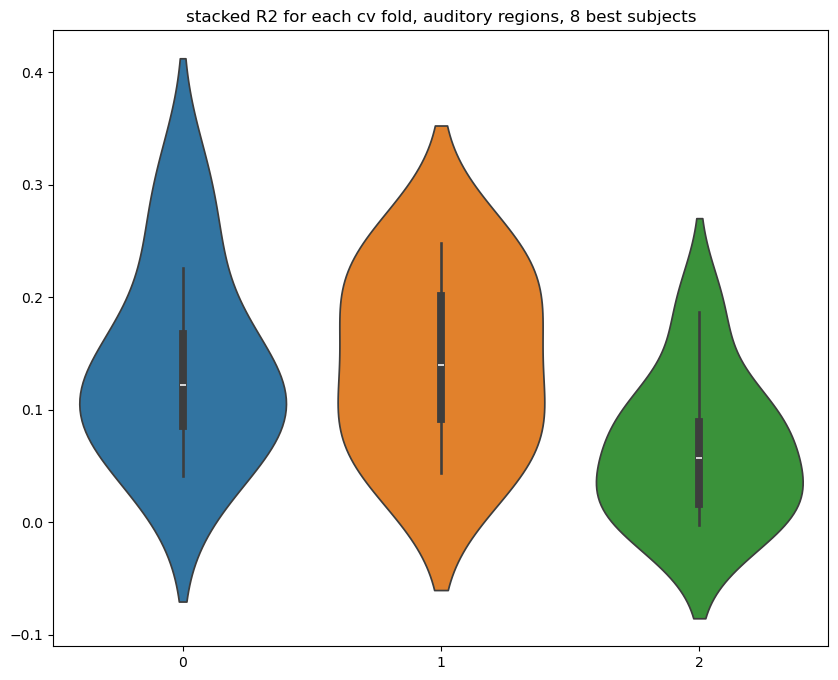

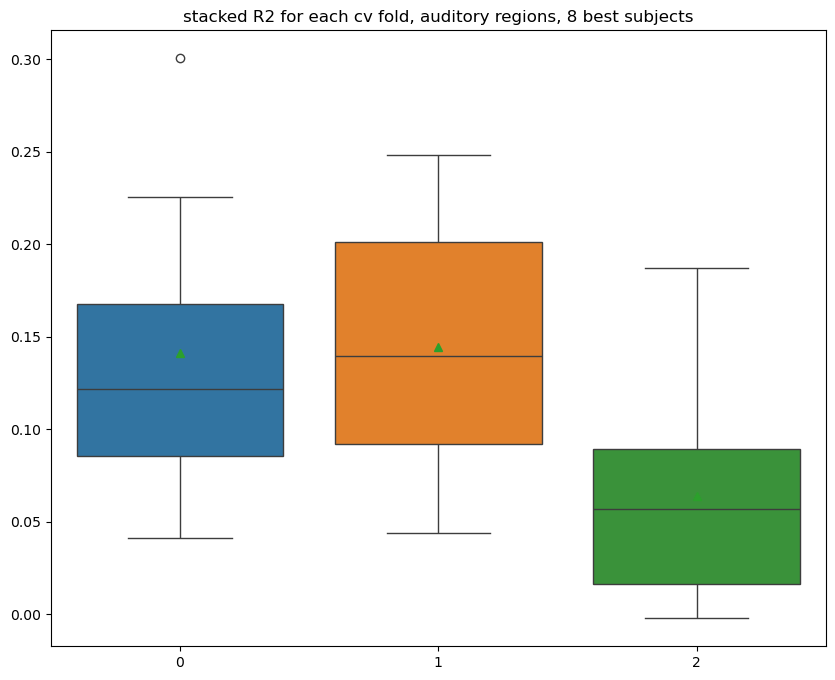

In [36]:
import matplotlib.pyplot as plt 
import seaborn as sns
plt.figure(figsize=(10,8))
ax=sns.violinplot(data=stacked_r2s_list_list.T)
plt.title(f'stacked R2 for each pca 1,10,100, auditory regions, cneuromod')

# # Add 'stacked' to the end of your features list
# labels = plot_data_labels

# # Set the xticklabels of your plot
# ax.set_xticks(range(len(labels)))
# ax.set_xticklabels(labels,rotation=90)
# plt.show()


# plt.figure(figsize=(20,8))
# ax=sns.boxplot(data=plot_data,showmeans=True)
# plt.title(f'stacked R2 for each feature set, auditory regions, 8 best subjects')

# # Add 'stacked' to the end of your features list
# labels = plot_data_labels

# # Set the xticklabels of your plot
# ax.set_xticks(range(len(labels)))
# ax.set_xticklabels(labels,rotation=90)
# plt.show()

plt.figure(figsize=(10,8))
ax=sns.boxplot(data=stacked_r2s_list_list.T,showmeans=True)
plt.title(f'stacked R2 for each pca 1,10,100, auditory regions, cneuromod')


In [7]:
import glob
def load_sub_brain_friends(sub,task,delay,atlas_indices_indices):        
    fmriprep_folder='/nese/mit/group/sig/projects/cneuromod/friends/postproc_fmriprep'
    pattern=f'{fmriprep_folder}/sub-{sub}/sub-{sub}_ses-*_task-{task}_space-fsLR_den-91k_bold_smoothed.dtseries.nii'
    im_file = glob.glob(pattern)[0]
    img = nb.load(im_file)
    img_y = img.get_fdata()
    Y=img_y[delay:,atlas_indices_indices]
    print(f'loaded brain data')
    return(Y)


In [8]:
import pilot
parcels=pilot.select_parcels('a4a5') # load parcel set
atlas_indices_indices=pilot.extract_parcels(parcels) # get indices of parcels
load_sub_brain_friends('01','s01e02a',0,atlas_indices_indices)

loaded parcels ['A4', 'A5']
/nese/mit/group/sig/projects/cneuromod/friends/postproc_fmriprep/sub-01/sub-01_ses-001_task-s01e02a_space-fsLR_den-91k_bold_smoothed.dtseries.nii


In [21]:
%run pilot-cnm-length.py -s 01 -p a4a5 -f 1 -t 5 -d 0

running subject 01
loaded parcels ['A4', 'A5']
loaded brain data
loaded brain data
starting regression
14.337780714035034
mean stacked r2s 0.13019138283751042
saving results


In [47]:
stacked_r2s_list_list=[]
for min in ['5', '10', '15', '23']:
    pca_list=[]
    for pca in ['1', '10', '100']:
        sub_list=[]
        for s in ['01', '02', '03', '04', '05', '06']:
            loaded=np.load(f'../good_pilots/sub-{s}_roi-a4a5_feat-crnpca{pca}_min-{min}_delay-0_friends_friends.npz')
            sub_list.append(np.mean(loaded['stacked_r2s']))
        pca_list.append(sub_list)
    stacked_r2s_list_list.append(np.asanyarray(pca_list))

In [48]:
data=np.asanyarray(stacked_r2s_list_list)

In [49]:
data.shape

(4, 3, 6)

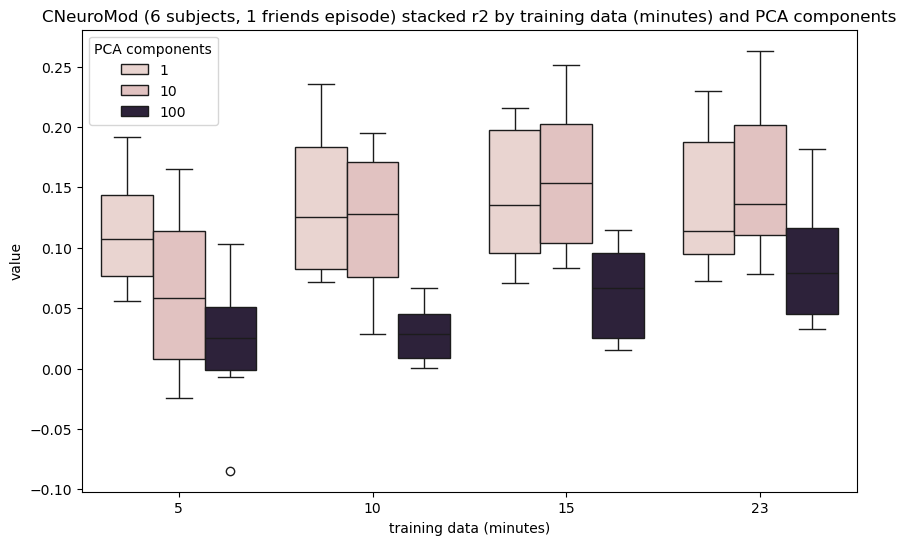

In [57]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Example data
#data = np.random.rand(4, 3, 6)

# Reshape the data for easy plotting
# First reshape to (4*3, 6) so that we have a single column for each of the 6 elements
reshaped_data = data.reshape(-1, 6)

# Convert to DataFrame
# We create a multi-index DataFrame to handle the first and second dimensions
df = pd.DataFrame(reshaped_data, columns=[f'Trial {i+1}' for i in range(6)])
#df['training data (minutes)'] = np.repeat(np.arange(4), 3)
df['training data (minutes)'] = np.repeat([5,10,15,23], 3)

df['PCA components'] = np.tile([1,10,100], 4)

# Melt the DataFrame to long format for seaborn plotting
df_melted = df.melt(id_vars=['training data (minutes)', 'PCA components'], var_name='Trial', value_name='value')

# Plot using seaborn
plt.figure(figsize=(10, 6))
sns.boxplot(x='training data (minutes)', y='value', hue='PCA components', data=df_melted)
plt.title('CNeuroMod (6 subjects, 1 friends episode) stacked r2 by training data (minutes) and PCA components')
plt.show()


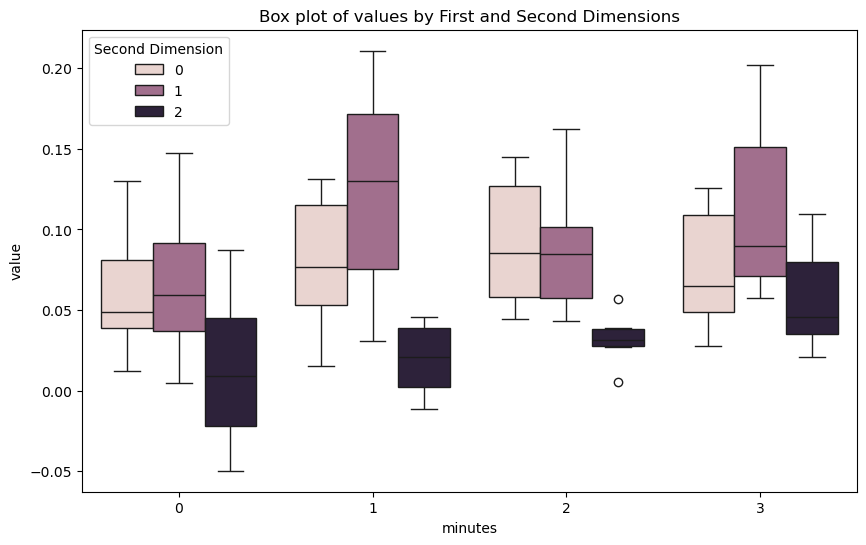

In [37]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Example data
#data = np.random.rand(4, 3, 6)

# Reshape the data for easy plotting
# First reshape to (4*3, 6) so that we have a single column for each of the 6 elements
reshaped_data = data.reshape(-1, 6)

# Convert to DataFrame
# We create a multi-index DataFrame to handle the first and second dimensions
df = pd.DataFrame(reshaped_data, columns=[f'Trial {i+1}' for i in range(6)])
df['minutes'] = np.repeat(np.arange(4), 3)
df['Second Dimension'] = np.tile(np.arange(3), 4)

# Melt the DataFrame to long format for seaborn plotting
df_melted = df.melt(id_vars=['minutes', 'Second Dimension'], var_name='Trial', value_name='value')

# Plot using seaborn
plt.figure(figsize=(10, 6))
sns.boxplot(x='minutes', y='value', hue='Second Dimension', data=df_melted)
plt.title('Box plot of values by First and Second Dimensions')
plt.show()
